In [ ]:
import pytest
from JuliaSetSecond import calculate_z_serial_purepython
class TestJuliaSet:
    def test_sum(self):
        cs, zs = self.gen_var()
        max_iterations = 300
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
        assert sum(output) == 33219980
    def gen_var(self):
        desired_width = 1000
        x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
        c_real, c_imag = -0.62772, -.42193
        """Create a list of complex coordinates (zs) and complex parameters (cs),
        build Julia set"""
        x_step = (x2 - x1) / desired_width
        y_step = (y1 - y2) / desired_width
        x = []
        y = []
        ycoord = y2
        while ycoord > y1:
            y.append(ycoord)
            ycoord += y_step
        xcoord = x1
        while xcoord < x2:
            x.append(xcoord)
            xcoord += x_step
        # build a list of coordinates and the initial condition for each cell.
        # Note that our initial condition is a constant and could easily be removed,
        # we use it to simulate a real-world scenario with several inputs to our
        # function
        zs = []
        cs = []
        for ycoord in y:
            for xcoord in x:
                zs.append(complex(xcoord, ycoord))
                cs.append(complex(c_real, c_imag))
        return cs, 
    
    
    
    

(myenv) erik@MBPsomthorErik3 Assignment 2 % pytest test_JuliaSet.py  
======================================= test session starts ========================================
platform darwin -- Python 3.11.3, pytest-8.3.4, pluggy-1.5.0
rootdir: /Users/erik/Desktop/Intro-to-high-performance-computing-group-11/Assignment 2
plugins: anyio-4.2.0
collected 1 item                                                                                   

test_JuliaSet.py .                                                                           [100%]

======================================== 1 passed in 2.31s =========================================

#Task 1.2: 

In [ ]:
import pytest
from JuliaSetSecond import calculate_z_serial_purepython

class TestJuliaSet:
    @pytest.mark.parametrize(
        "max_iterations, desired_width, expected_sum",
        [
            (300, 1000, 33219980),  # Example: original test case
            (200, 500, 8309980)   # Example: idk what to put to make it work
        ]
    )
    def test_sum(self, max_iterations, desired_width, expected_sum):
        cs, zs = self.gen_var(desired_width)
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
        assert sum(output) == expected_sum

    def gen_var(self, desired_width):
        x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
        c_real, c_imag = -0.62772, -0.42193

        x_step = (x2 - x1) / desired_width
        y_step = (y1 - y2) / desired_width

        x = []
        y = []

        ycoord = y2
        while ycoord > y1:
            y.append(ycoord)
            ycoord += y_step

        xcoord = x1
        while xcoord < x2:
            x.append(xcoord)
            xcoord += x_step

        zs = []
        cs = []

        for ycoord in y:
            for xcoord in x:
                zs.append(complex(xcoord, ycoord))
                cs.append(complex(c_real, c_imag))

        return cs, zs


(myenv) erik@MBPsomthorErik3 Assignment 2 % pytest test_JuliaSet.py
======================================= test session starts ========================================
platform darwin -- Python 3.11.3, pytest-8.3.4, pluggy-1.5.0
rootdir: /Users/erik/Desktop/Intro-to-high-performance-computing-group-11/Assignment 2
plugins: anyio-4.2.0
collected 2 items                                                                                  

test_JuliaSet.py .F                                                                          [100%]

============================================= FAILURES =============================================
______________________________ TestJuliaSet.test_sum[200-500-8309980] ______________________________

self = <test_JuliaSet.TestJuliaSet object at 0x1010788d0>, max_iterations = 200, desired_width = 500
expected_sum = 8309980

    @pytest.mark.parametrize(
        "max_iterations, desired_width, expected_sum",
        [
            (300, 1000, 33219980),  # Example: original test case
            (200, 500, 8309980)   # Example: idk what to put to make it work
        ]
    )
    def test_sum(self, max_iterations, desired_width, expected_sum):
        cs, zs = self.gen_var(desired_width)
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
>       assert sum(output) == expected_sum
E       assert 5798200 == 8309980
E        +  where 5798200 = sum([0, 0, 0, 0, 0, 0, ...])

test_JuliaSet.py:15: AssertionError
--------------------------------------- Captured stdout call ---------------------------------------
@timefn: calculate_z_serial_purepython took 0.36625333299161866 seconds
===================================== short test summary info ======================================
FAILED test_JuliaSet.py::TestJuliaSet::test_sum[200-500-8309980] - assert 5798200 == 8309980
=================================== 1 failed, 1 passed in 2.72s ====================================

## Exercise 3

Advantages: It lets me step through my code line by line, so I can see exactly where things go wrong. I can also inspect variables at different points, which helps a lot with figuring out unexpected behavior. It’s much faster than just printing everything out and guessing where the issue is.  

Disadvantages: The command-line interface of `pdb` isn’t beginner-friendly. Remembering all the commands took a lot of effort, and sometimes I had to restart my debugging session when I messed up. It doesn’t have a GUI, so it’s not as intuitive as visual debuggers like those in PyCharm or VS Code, where you can set breakpoints and see variable values more easily.

# Bonus Exercise

## Task B.1 

Check the code with a linter, and in case, run an auto-formatter. Produce HTML documentation running sphinx.

In [2]:
!flake8 conway_perf.py

conway_perf.py:2:10: W291 trailing whitespace
conway_perf.py:9:1: F401 'sys' imported but unused
conway_perf.py:9:11: E401 multiple imports on one line
conway_perf.py:11:1: F401 'matplotlib.pyplot as plt' imported but unused
conway_perf.py:12:1: F401 'matplotlib.animation' imported but unused
conway_perf.py:28:11: E203 whitespace before ':'
conway_perf.py:28:22: E203 whitespace before ':'
conway_perf.py:57:11: E203 whitespace before ':'
conway_perf.py:57:23: E203 whitespace before ':'


In [3]:
!black conway_perf.py


All done! ✨ 🍰 ✨
1 file left unchanged.


See docs/build/html for HTML documentation generated using sphinx

## Task B.2

The iteration is fixed to 100

Grid size: 10x10, Execution time: 0.013810 seconds
Grid size: 20x20, Execution time: 0.053480 seconds
Grid size: 30x30, Execution time: 0.120816 seconds
Grid size: 40x40, Execution time: 0.221541 seconds
Grid size: 50x50, Execution time: 0.340999 seconds
Grid size: 60x60, Execution time: 0.503282 seconds
Grid size: 70x70, Execution time: 0.692358 seconds
Grid size: 80x80, Execution time: 0.885365 seconds
Grid size: 90x90, Execution time: 1.129480 seconds
Grid size: 100x100, Execution time: 1.416006 seconds


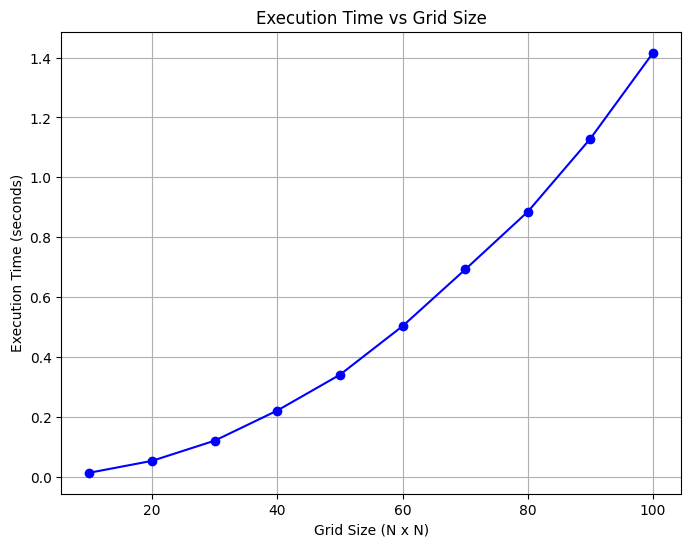

In [1]:
import subprocess
import matplotlib.pyplot as plt

def run_program(grid_size):
    command = ["python", "conway_perf.py", "--grid-size", str(grid_size), "--iterations", "100"]
    
    result = subprocess.run(command, capture_output=True, text=True)
    return result.stdout, result.stderr


iteration = 5
grid_sizes = range(10, 101, 10)
execution_times = []
for size in grid_sizes:
    stdout, stderr = run_program(size)
    if stderr:
        print("Error:", stderr)
    else:
        time_taken = float(stdout.strip().split()[-1])  # Assuming last output is execution time
        print(f"Grid size: {size}x{size}, Execution time: {time_taken:.6f} seconds")
    execution_times.append(time_taken)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(grid_sizes, execution_times, marker='o', linestyle='-', color='b')
plt.xlabel("Grid Size (N x N)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Grid Size")
plt.grid(True)
plt.show()

## Task B.3

Grid size: 10x10, Execution time: 0.007905 seconds
Grid size: 20x20, Execution time: 0.008341 seconds
Grid size: 30x30, Execution time: 0.008317 seconds
Grid size: 40x40, Execution time: 0.008411 seconds
Grid size: 50x50, Execution time: 0.010324 seconds
Grid size: 60x60, Execution time: 0.009985 seconds
Grid size: 70x70, Execution time: 0.011410 seconds
Grid size: 80x80, Execution time: 0.013355 seconds
Grid size: 90x90, Execution time: 0.016403 seconds
Grid size: 100x100, Execution time: 0.014528 seconds


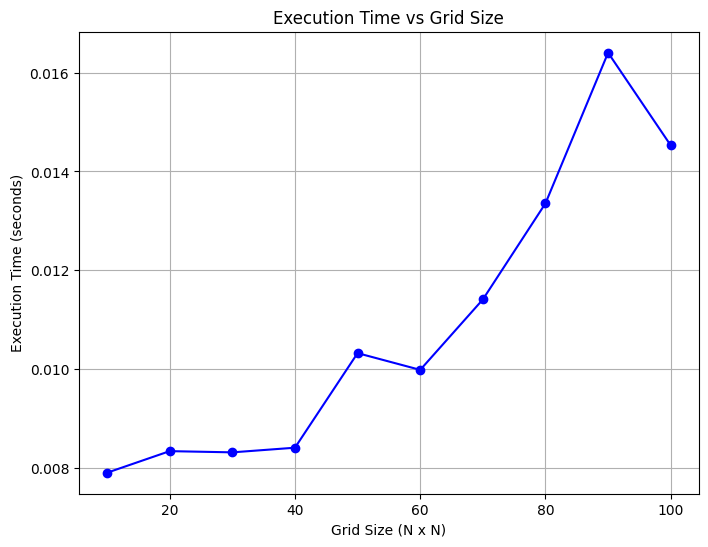

In [7]:
import subprocess
import matplotlib.pyplot as plt

def run_program(grid_size):
    command = ["python", "conway_perf_optimize.py", "--grid-size", str(grid_size), "--iterations", "100"]
    
    result = subprocess.run(command, capture_output=True, text=True)
    return result.stdout, result.stderr


iteration = 5
grid_sizes = range(10, 101, 10)
execution_times = []
for size in grid_sizes:
    stdout, stderr = run_program(size)
    if stderr:
        print("Error:", stderr)
    else:
        time_taken = float(stdout.strip().split()[-1])  # Assuming last output is execution time
        print(f"Grid size: {size}x{size}, Execution time: {time_taken:.6f} seconds")
    execution_times.append(time_taken)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(grid_sizes, execution_times, marker='o', linestyle='-', color='b')
plt.xlabel("Grid Size (N x N)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Grid Size")
plt.grid(True)
plt.show()